# SVMの境界線を可視化する


【参考サイト】http://www.tsjshg.info/udemy/Lec82-83.html

1. irisのデータセットを読み込む

In [14]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_csv('iris_dataset.csv')
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


2. 2次元で可視化するため、説明変数を2つに絞る（SepalLengthとSepalWidthを選択）

In [3]:
data = df[['SepalLength', 'SepalWidth']]
label = df['Name']

グラフ描画のために、ラベルを数値化

In [59]:
nlabel=[]
for i in range(label.count()):
    if label[i] == 'setosa':
        nlabel.append(0)
    elif label[i] == 'versicolor':
        nlabel.append(1)
    elif label[i] == 'virginica':
        nlabel.append(2)

3. 学習用と評価用に分割

In [61]:
train_d, test_d, train_l, test_l = train_test_split(data, nlabel, test_size=0.3)

4. 分類器を作成

In [62]:
clf = SVC(C=1, gamma=0.01, kernel='rbf')
clf.fit(train_d, train_l)

SVC(C=1, gamma=0.01)

5. meshgrid（格子座標）の作成

In [19]:
# stepsize
h = 0.02

# X軸の範囲指定（X軸:SepalLength）
x_min = np.min(data.iloc[:,0]) - 1
x_max = np.max(data.iloc[:,0]) + 1

# Y軸の範囲指定（Y軸:SepalWidth）
y_min = np.min(data.iloc[:,1]) - 1
y_max = np.max(data.iloc[:,1]) + 1

# meshgridを作成
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [24]:
xx

array([[3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       ...,
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88]])

In [25]:
yy

array([[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.02, 1.02, 1.02, ..., 1.02, 1.02, 1.02],
       [1.04, 1.04, 1.04, ..., 1.04, 1.04, 1.04],
       ...,
       [5.34, 5.34, 5.34, ..., 5.34, 5.34, 5.34],
       [5.36, 5.36, 5.36, ..., 5.36, 5.36, 5.36],
       [5.38, 5.38, 5.38, ..., 5.38, 5.38, 5.38]])

In [63]:
# 各格子座標について、作成した分類器で予測する
#   flattenは多次元配列を1次元に変換するメソッド

Z = clf.predict(np.c_[xx.flatten(), yy.flatten()])

In [35]:
print(np.c_[xx.flatten(), yy.flatten()])

[[3.3  1.  ]
 [3.32 1.  ]
 [3.34 1.  ]
 ...
 [8.84 5.38]
 [8.86 5.38]
 [8.88 5.38]]


In [64]:
Z = Z.reshape(xx.shape)
print(Z)

[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


6. グラフの作成

In [50]:
from matplotlib import pyplot as plt

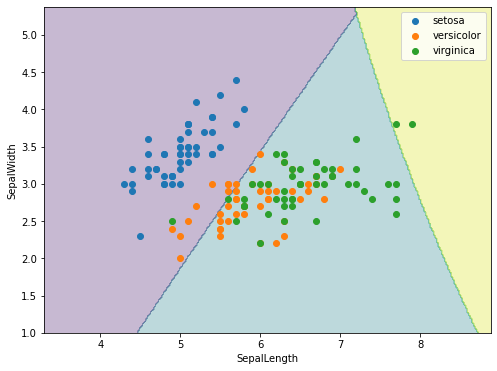

In [80]:
plt.figure(figsize=(8,6))

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data.loc[label=='setosa', 'SepalLength'], data.loc[label=='setosa', 'SepalWidth'], label='setosa')
plt.scatter(data.loc[label=='versicolor', 'SepalLength'], data.loc[label=='versicolor', 'SepalWidth'], label='versicolor')
plt.scatter(data.loc[label=='virginica', 'SepalLength'], data.loc[label=='virginica', 'SepalWidth'], label='virginica')
#plt.scatter(data.loc[:,'SepalLength'], data.loc[:,'SepalWidth'], c=nlabel, cmap=plt.cm.tab10)
plt.legend()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')

plt.show()

7. 正解率を算出

In [82]:
score = clf.score(data, nlabel)
print(f"正解率: {score:.3f}")

正解率: 0.613


versicolorとvirginicaの分布が重なっており、この2つをうまく分類できていないために正解率が悪いことがわかった。

rbf(非線形)カーネルなのに境界がほぼ線形になっている。
パラメータ調整でもう少し精度が上がるのではないか。

8. ガンマを調整

In [83]:
clf2 = SVC(C=1, gamma=1, kernel='rbf')
clf2.fit(train_d, train_l)

Z2 = clf2.predict(np.c_[xx.flatten(), yy.flatten()])
Z2 = Z2.reshape(xx.shape)

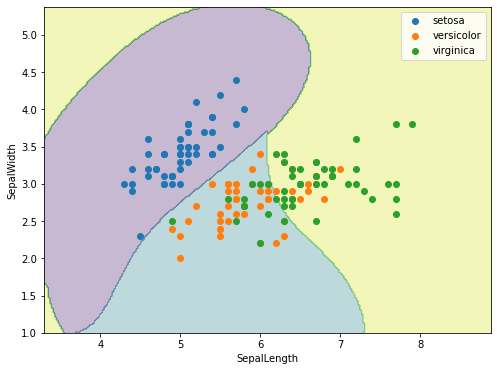

In [85]:
plt.figure(figsize=(8,6))

plt.contourf(xx, yy, Z2, alpha=0.3)
plt.scatter(data.loc[label=='setosa', 'SepalLength'], data.loc[label=='setosa', 'SepalWidth'], label='setosa')
plt.scatter(data.loc[label=='versicolor', 'SepalLength'], data.loc[label=='versicolor', 'SepalWidth'], label='versicolor')
plt.scatter(data.loc[label=='virginica', 'SepalLength'], data.loc[label=='virginica', 'SepalWidth'], label='virginica')
#plt.scatter(data.loc[:,'SepalLength'], data.loc[:,'SepalWidth'], c=nlabel, cmap=plt.cm.tab10)
plt.legend()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')

plt.show()

In [86]:
score2 = clf2.score(data, nlabel)
print(f"正解率: {score2:.3f}")

正解率: 0.827


可視化することによってSVMがどのように分類しているのか一目で分かり、パラメータチューニングの参考にもなる。